# Ignore Warnings

In [1]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Import Libraries


In [2]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from collections import Counter
from utils.textnormalization import Text_Normalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.text_preprocessing import data_words, words_to_index_, index_to_word_, word_counts, text_to_sequence, sequences_padding, one_hot_encoding
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import generate_poitive_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
from utils.transformers_ import sentiment_analysis_transformers
from utils.model_inference import machine_learning_inference, deep_learning_inference
from utils.word_vector import word_vector_
tokenizer_ = RegexpTokenizer(r'\w+')
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Us

True

# Read Data

In [4]:
Corpus = pd.read_csv('movie_data.csv')
Corpus.rename(columns={'review': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({0:'Negative', 1: 'Positive'})
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus = Corpus.sample(frac=1, random_state=44, ignore_index=True)
Corpus.index = Corpus.index + 1
Corpus.tail(10)

,Review,Sentiment
49991,Why do people need to follow the opinion of th...,Positive
49992,"I was unsure what to expect from ""driving less...",Positive
49993,"technically, this movie would have had it all:...",Negative
49994,"""Wired"" would have to rate as one of the ten w...",Negative
49995,Hopalong Cassidy with a horse who is not white...,Negative
49996,"First of all, let me say this film isn't for e...",Positive
49997,The 3 stars are for Phillip Seymour Hoffman. N...,Negative
49998,Unconditional Love is one of the best movies I...,Positive
49999,Why???? What a disgusting joke of a supposed m...,Negative
50000,I thought this was a really well written film....,Positive


# Validation Data

In [5]:
reviews = [
    "The movie was fantastic! I really loved the story and the acting was great.",
    "The film was boring and too long. I almost fell asleep.",
    "What a waste of time, terrible plot and awful characters!",
    "An absolute masterpiece, visually stunning and emotionally touching.",
    "The direction was poor, and the plot was hard to follow.",
    "I enjoyed every minute of the movie, especially the special effects!",
    "The movie had a slow start but picked up towards the middle and ended strong.",
    "I wouldn’t recommend this film, the dialogue was cheesy and predictable.",
    "The acting was top-notch, and the story was deeply moving.",
    "The film was just okay, not as great as I expected it to be.",
    "It was one of the best films I've seen this year! Highly recommend.",
    "The soundtrack was fantastic, but the storyline was confusing and hard to follow."
]

# Sentiment Information

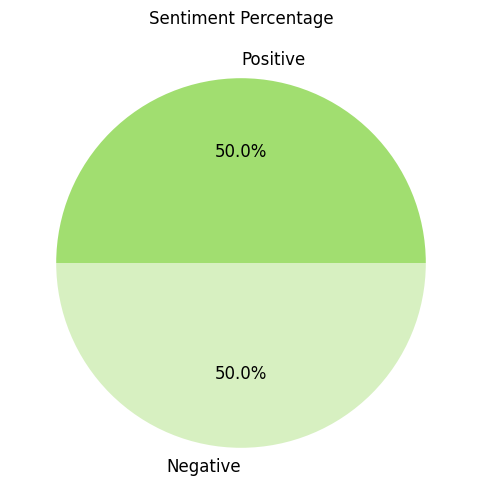

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

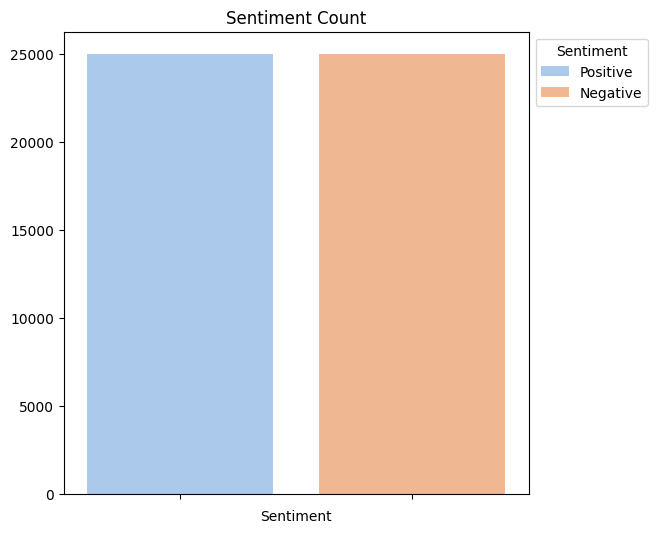

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

537072

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus['Review'].apply(lambda n:len(tokenizer_.tokenize(n)))
Corpus["Number of Words 1"].sum()

11976895

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

240

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

2525

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

6

In [16]:
Corpus[Corpus["Number of Words 1"] == 0]

,Review,Sentiment,NumberOfSentences,Number of Words 1


# Number Of Charachters Before Text Normalization

In [17]:
Corpus["Number of Charachters 1"] = Corpus['Review'].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 1"].sum()

51167213

# Average Number Of Charachters Before Text Normalization

In [18]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

1023

# Maximum Number Of Charachters Before Text Normalization

In [19]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

10862

# Minimum Number Of Charachters Before Text Normalization

In [20]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

25

In [21]:
Corpus[Corpus['Number of Charachters 1']==0]

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1


# Most Frequent Words Before Text Normalization

In [22]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

,Word,Count
1,the,568735
2,a,306960
3,and,301919
4,of,283625
5,to,261850
6,is,203056
7,in,169981
8,I,132498
9,that,126818
10,this,113726


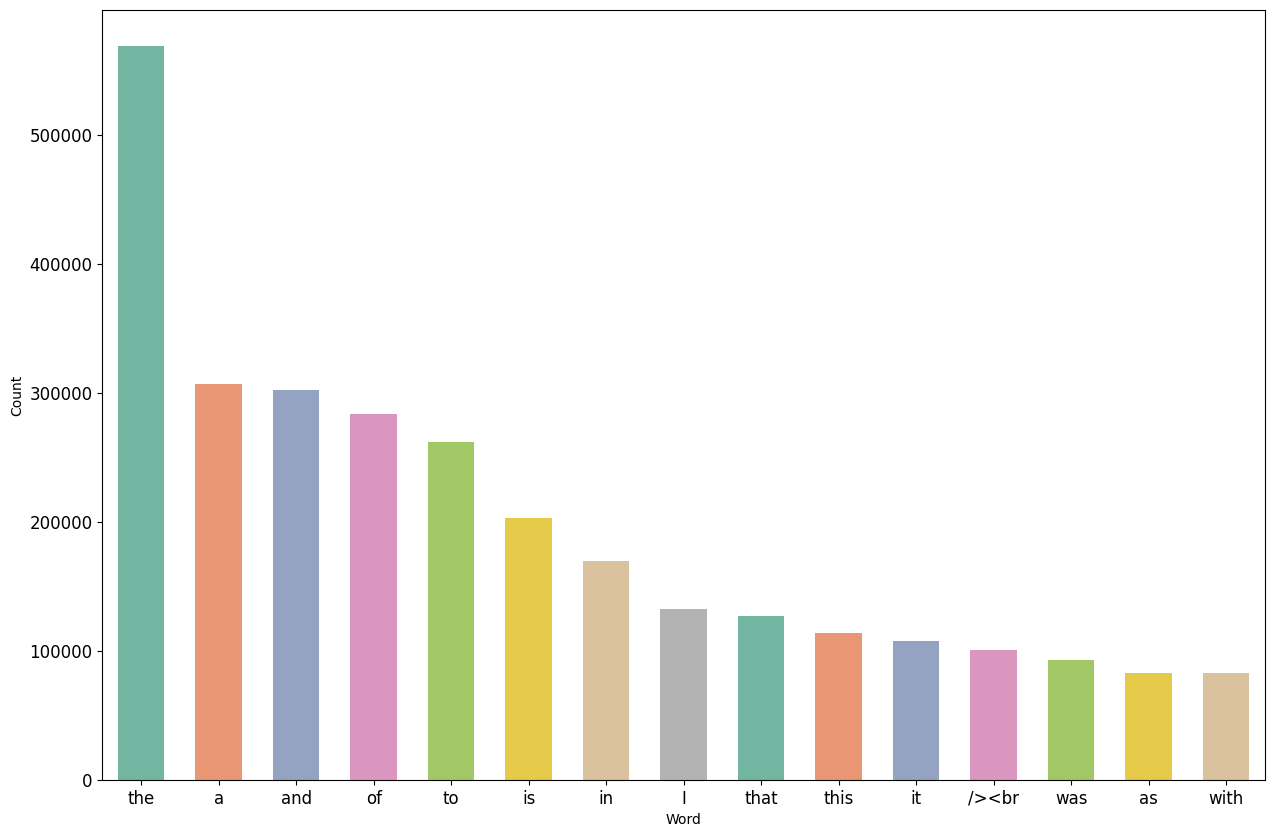

In [23]:
bar_plot(data=MostFrequentWordDF1,  x = 'Word', y='Count')

# Text Normalization

In [24]:
text_normalization = Text_Normalization(string_lower = True,
                                        remove_emojis = True,
                                        remove_hashtags = True,
                                        remove_emails = True,
                                        remove_url = True,
                                        remove_mention = True,
                                        remove_html_tags = True,
                                        remove_new_line_char = True,
                                        remove_duplicate_word = True,
                                        remove_single_letter = True,
                                        remove_duplicated_letter = True,
                                        expand_contractions = True,
                                        remove_stop_words = True,
                                        remove_unicode_and_special_character = True,
                                        remove_latin_letter = True,
                                        remove_punctuations = True,
                                        remove_number = True,
                                        remove_longest_than = True,
                                        remove_extra_whitespace = True)


In [25]:
Corpus['Normalized_Review'] = Corpus['Review'].map(lambda x: text_normalization.text_normalization(x))
Corpus.dropna(axis=1, inplace=True)
Corpus.to_csv('Normalized Corpus.csv')
Corpus.head()

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1,Normalized_Review
1,"i enjoyed this film immensely, due to pungent ...",Positive,4,148,592,enjoyed film immensely due pungent scenes humo...
2,"I saw this ego-centric ""effort"" at achieving a...",Negative,8,269,1172,saw ego centric effort achieving film epic sta...
3,Some of my favorite Laurel and Hardy films hav...,Positive,12,239,1009,favorite laurel hardy films little plot give m...
4,The retelling of a classic story is set to the...,Positive,6,111,464,retelling classic story set music burt bachara...
5,"""Boy Next Door"" is a hilarious romp through ma...",Positive,10,124,560,boy next door hilarious romp male neurosis min...


# Number Of Unique Words

In [26]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

98562

# WordCloud

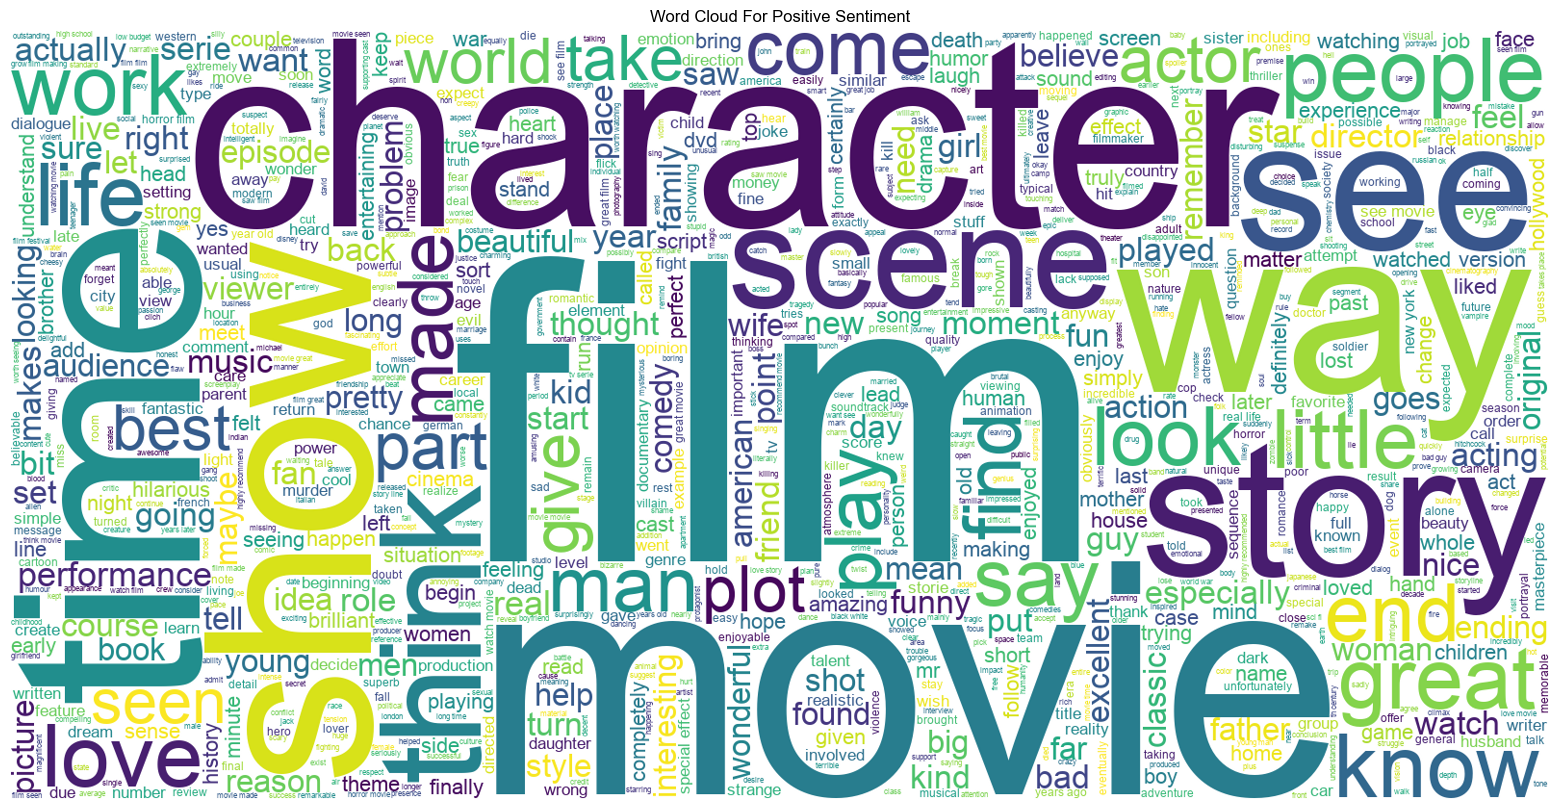

In [27]:
wordcloud(data=Corpus, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

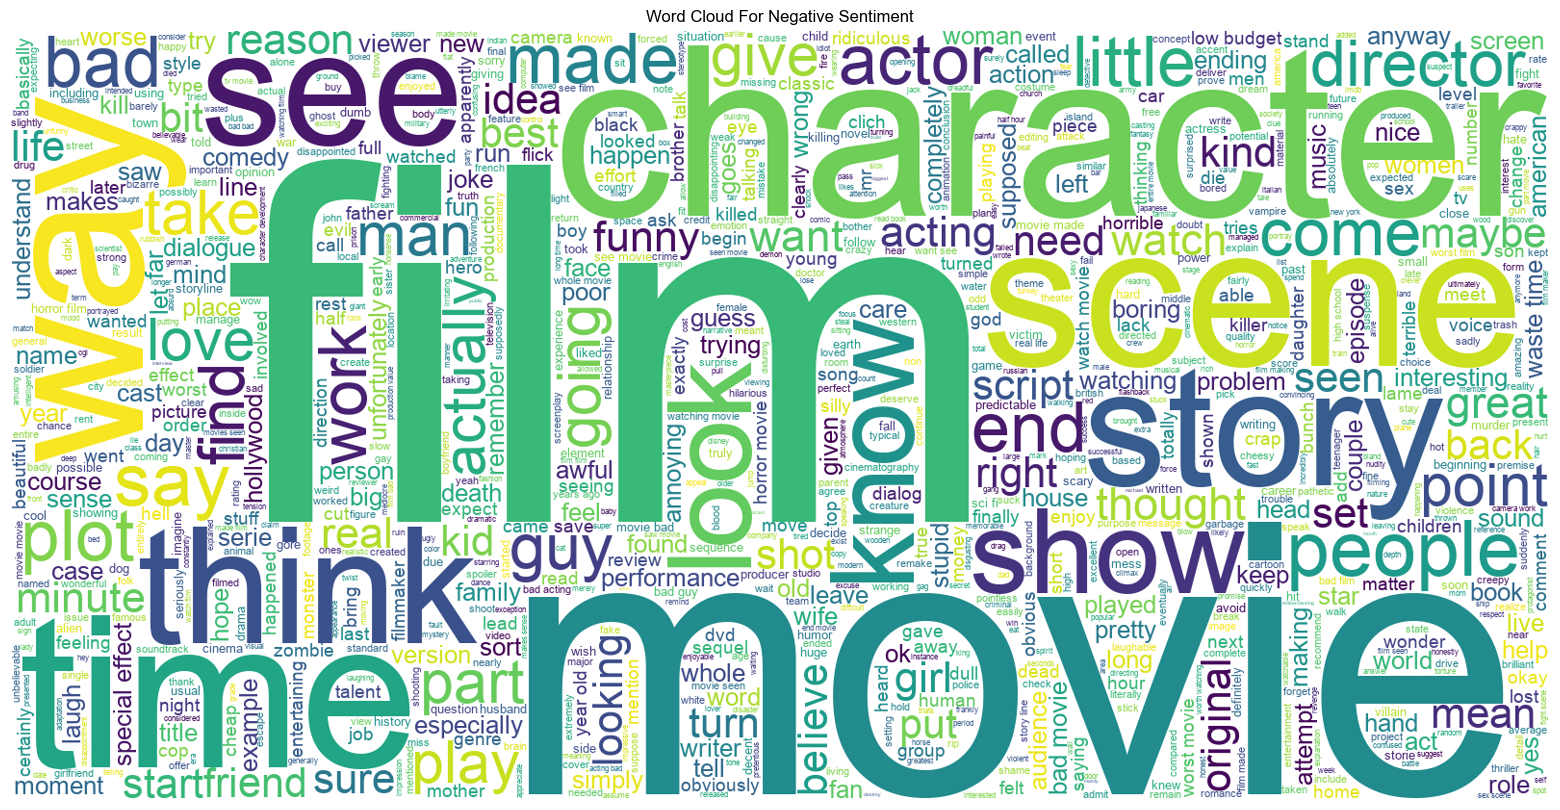

In [28]:
wordcloud(data=Corpus, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

In [29]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(tokenizer_.tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

5059359

# Average Number Of Words After Text Normalization

In [30]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

101

# Maximum Number Of Word After Text Normalization

In [31]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

1271

# Minimum Number Of Words After Text Normalization

In [32]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

1

# Number Of Charachters After Text Normalization

In [33]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 2"].sum()

30586951

# Average Number Of Charachters After Text Normalization

In [34]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

612

# Maximum Number Of Charachters After Text Normalization

In [35]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

7135

# Minimum Number Of Charachters After Text Normalization

In [36]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

2

# Most Frequent Words After Text Normalization

In [37]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

,Word,Count
1,movie,87876
2,film,79632
3,like,40110
4,time,25075
5,story,23111
6,see,22989
7,bad,18406
8,people,18163
9,great,18124
10,made,16142


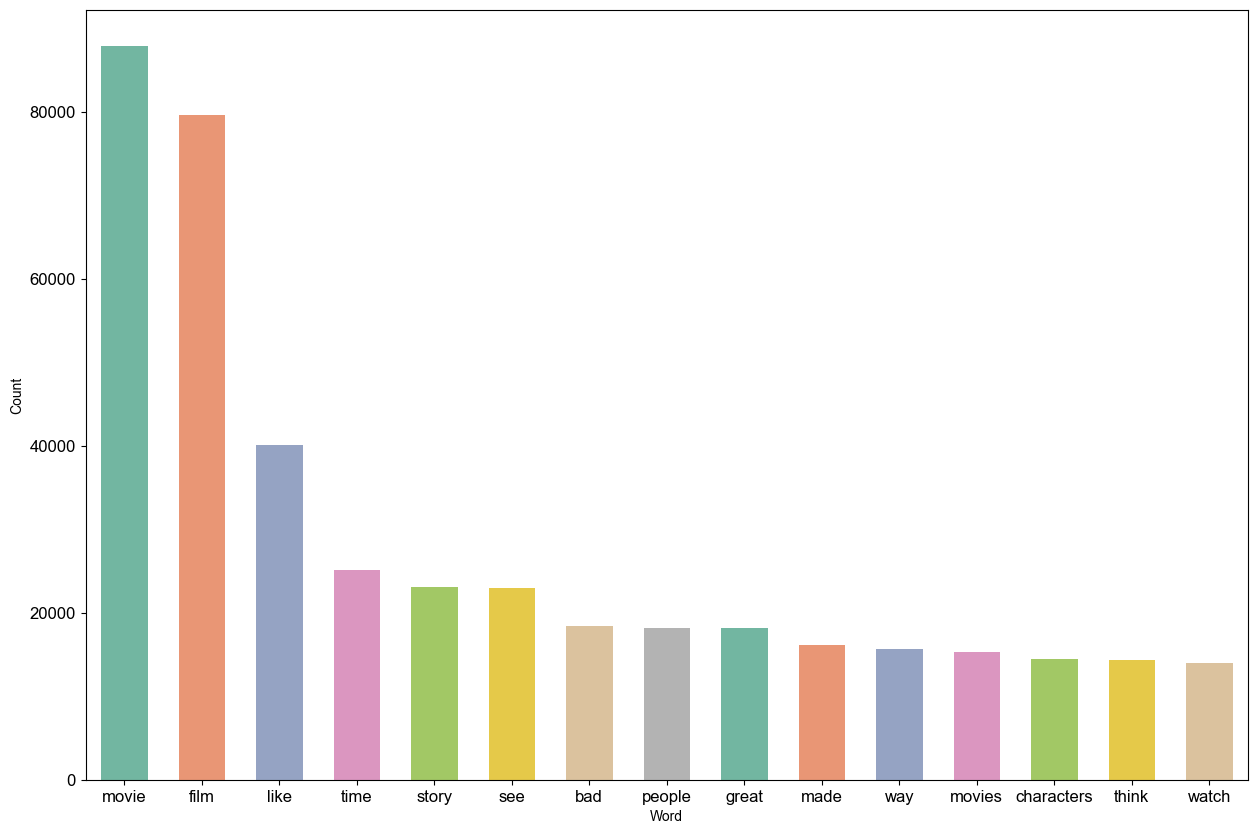

In [38]:
bar_plot(data=MostFrequentWordDF2, x = 'Word', y='Count')

# Most Frequent Words Of Each Sentiment

**1-Positive**

In [39]:
Positive = Corpus[Corpus['Sentiment'] == 'Positive']

In [40]:
PositiveMostFrequentWord = Counter((Positive['Normalized_Review']).str.split().explode()).most_common(10)
PositiveMostFrequentWordDF = pd.DataFrame(PositiveMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
PositiveMostFrequentWordDF

,Word,Count
1,film,42080
2,movie,37824
3,like,17687
4,great,12949
5,story,12933
6,time,12735
7,see,12257
8,people,8711
9,love,8674
10,best,8502


**2-Negative**

In [41]:
Negative = Corpus[Corpus['Sentiment'] == 'Negative']

In [42]:
NegativeMostFrequentWord = Counter((Negative['Normalized_Review']).str.split().explode()).most_common(10)
NegativeMostFrequentWordDF = pd.DataFrame(NegativeMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
NegativeMostFrequentWordDF

,Word,Count
1,movie,50052
2,film,37552
3,like,22423
4,bad,14665
5,time,12340
6,see,10732
7,story,10178
8,people,9452
9,made,8797
10,movies,8304


# Part Of Speech Tagging (POS)

In [43]:
word_ = list(UniqueWords)
pos = nltk.pos_tag(word_)
word = []
tag = []

In [44]:
for i in pos:
    word.append(i[0])
    tag.append(i[1])

In [45]:
pos = pd.DataFrame(zip(word, tag), columns=['Word', 'Tag'])
pos.tail()

,Word,Tag
98557,pheromones,NNS
98558,waxork,NN
98559,supermans,NNS
98560,unredemable,JJ
98561,intellect,NN


In [46]:
pos['Tag'].value_counts()

Tag
NN      37605
JJ      20007
NNS     13261
VBP      7703
VBG      5019
RB       4388
VBD      4300
VBZ      1919
VBN      1535
IN        701
VB        410
JJS       402
JJR       385
FW        310
NNP       203
RBR       202
CC         39
CD         34
RP         32
PRP        23
WP         20
RBS        15
DT         14
MD         13
WRB         8
PRP$        5
WDT         4
POS         3
EX          2
Name: count, dtype: int64

# Bigrams

In [47]:
Corpus['Bigrams'] = Corpus['Normalized_Review'].apply(lambda x: list(nltk.bigrams(x.split( ))))
Corpus

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1,Normalized_Review,Number of Words 2,Number of Charachters 2,Bigrams
1,"i enjoyed this film immensely, due to pungent ...",Positive,4,148,592,enjoyed film immensely due pungent scenes humo...,55,337,"[(enjoyed, film), (film, immensely), (immensel..."
2,"I saw this ego-centric ""effort"" at achieving a...",Negative,8,269,1172,saw ego centric effort achieving film epic sta...,126,755,"[(saw, ego), (ego, centric), (centric, effort)..."
3,Some of my favorite Laurel and Hardy films hav...,Positive,12,239,1009,favorite laurel hardy films little plot give m...,99,575,"[(favorite, laurel), (laurel, hardy), (hardy, ..."
4,The retelling of a classic story is set to the...,Positive,6,111,464,retelling classic story set music burt bachara...,57,310,"[(retelling, classic), (classic, story), (stor..."
5,"""Boy Next Door"" is a hilarious romp through ma...",Positive,10,124,560,boy next door hilarious romp male neurosis min...,69,400,"[(boy, next), (next, door), (door, hilarious),..."
...,...,...,...,...,...,...,...,...,...
49996,"First of all, let me say this film isn't for e...",Positive,15,190,768,let say film strange subject matter spinster l...,71,409,"[(let, say), (say, film), (film, strange), (st..."
49997,The 3 stars are for Phillip Seymour Hoffman. N...,Negative,11,157,634,stars phillip seymour hoffman movie deserves w...,67,377,"[(stars, phillip), (phillip, seymour), (seymou..."
49998,Unconditional Love is one of the best movies I...,Positive,15,195,777,unconditional love best movies seen emotional ...,88,482,"[(unconditional, love), (love, best), (best, m..."
49999,Why???? What a disgusting joke of a supposed m...,Negative,16,621,2412,disgusting joke supposed movie poster looked l...,269,1415,"[(disgusting, joke), (joke, supposed), (suppos..."


# Split The Dataset Into Dependent (X) And Independent (y)

In [48]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [49]:
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,  stratify=y)

# Vectorizer

In [51]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Mapping

In [52]:
Word_mapping = Vectorizer.vocabulary_
Word_mapping_ =pd.DataFrame((list(Word_mapping.items())), columns=['Word', 'Mapping'])
Word_mapping_.head()

,Word,Mapping
0,saw,69140
1,shelves,71324
2,rental,65680
3,place,60083
4,rented,65684


# Machine Learning

**1-Naive Bayes**

In [53]:
Algorithm = MultinomialNB(alpha= 1)
model_1 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_1, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

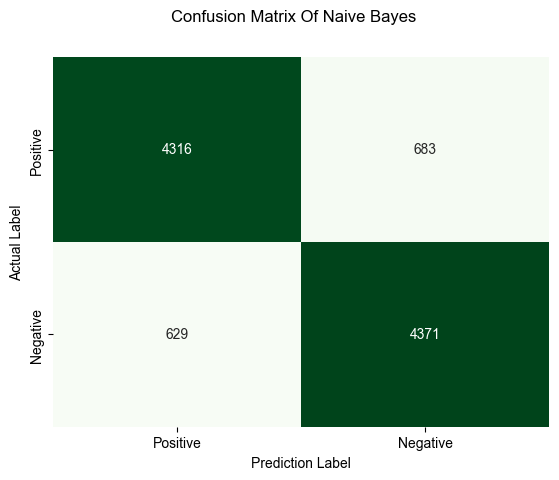

In [54]:
y_predNB = model_1.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusion_matrix = ConfusionMatrixNB, name = 'Naive Bayes')
False_PositiveNB, True_PositiveNB, False_NegativeNB, True_NegativeNB = generate_poitive_negative(ConfusionMatrixNB)

In [55]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [56]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

,Values
Accuracy,0.868787
Precision,0.863373
Sensitivity,0.872801
Specificity,0.864860
F1Score,0.868061
Error,0.131213


**2-Logistic Regression**

In [57]:
Algorithm = LogisticRegression()
model_2 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_2, X_train=X_train_Vec, y_train=y_train)

LogisticRegression()

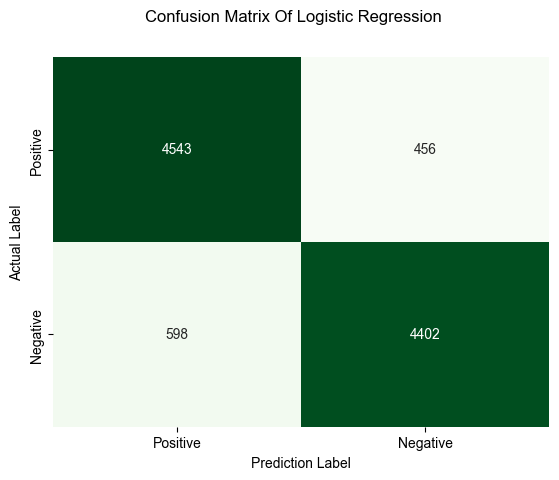

In [58]:
y_predLR = model_2.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusion_matrix = ConfusionMatrixLR, name = 'Logistic Regression')
False_PositiveLR, True_PositiveLR, False_NegativeLR, True_NegativeLR = generate_poitive_negative(ConfusionMatrixLR)

In [59]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [60]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

,Values
Accuracy,0.894589
Precision,0.908782
Sensitivity,0.883680
Specificity,0.906134
F1Score,0.896055
Error,0.105411


**3-Decision Tree**

In [61]:
Algorithm = DecisionTreeClassifier(criterion='gini', )
model_3 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_3, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier()

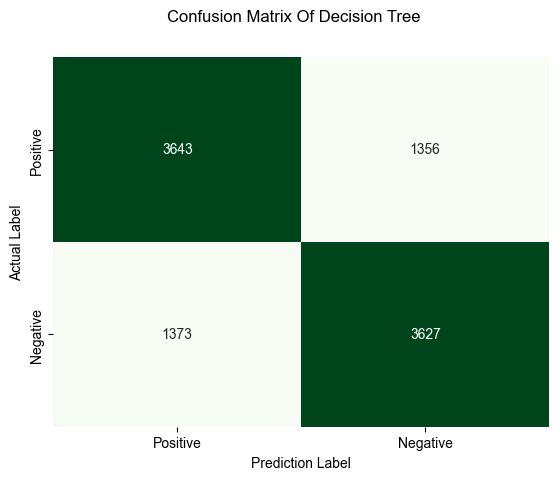

In [62]:
y_predDT = model_3.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusion_matrix = ConfusionMatrixDT, name = 'Decision Tree')
False_PositiveDT, True_PositiveDT, False_NegativeDT, True_NegativeDT = generate_poitive_negative(ConfusionMatrixDT)

In [63]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [64]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

,Values
Accuracy,0.727073
Precision,0.728746
Sensitivity,0.726276
Specificity,0.727875
F1Score,0.727509
Error,0.272927


**4-K Nearest Neighbors**

In [65]:
Algorithm =KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance', p=2)
model_4 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_4, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(weights='distance')

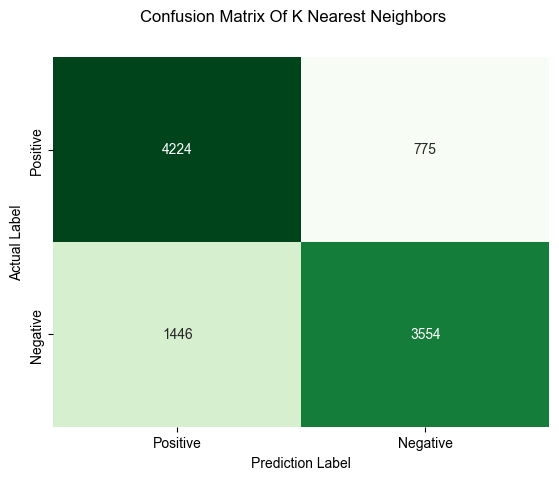

In [66]:
y_predKNN = model_4.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusion_matrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')
False_PositiveKNN, True_PositiveKNN, False_NegativeKNN, True_NegativeKNN = generate_poitive_negative(ConfusionMatrixKNN)

In [67]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [68]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

,Values
Accuracy,0.777878
Precision,0.844969
Sensitivity,0.744974
Specificity,0.820975
F1Score,0.791827
Error,0.222122


**5-Random Forest**

In [69]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100, )
model_5 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_5, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

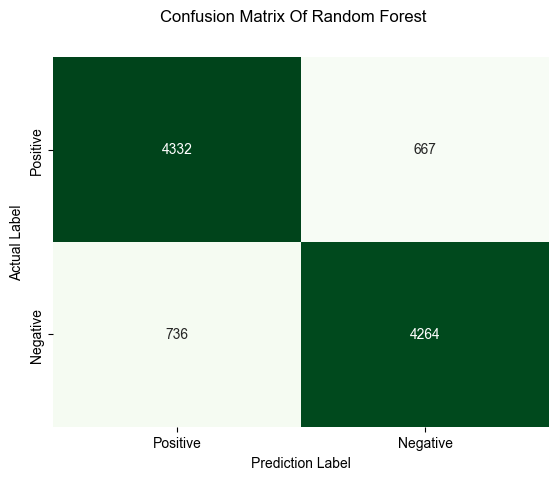

In [70]:
y_predRF = model_5.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusion_matrix = ConfusionMatrixRF, name = 'Random Forest')
False_PositiveRF, True_PositiveRF, False_NegativeRF, True_NegativeRF = generate_poitive_negative(ConfusionMatrixRF)

In [71]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [72]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

,Values
Accuracy,0.859686
Precision,0.866573
Sensitivity,0.854775
Specificity,0.864733
F1Score,0.860634
Error,0.140314


**6-SGD Classifier**

In [73]:
Algorithm = SGDClassifier(loss='hinge', )
model_6 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_6, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

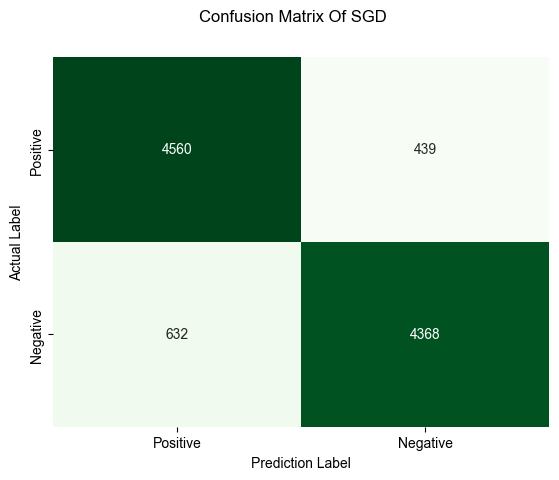

In [74]:
y_predSGD = model_6.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusion_matrix = ConfusionMatrixSGD, name = 'SGD')
False_PositiveSGD, True_PositiveSGD, False_NegativeSGD, True_NegativeSGD = generate_poitive_negative(ConfusionMatrixSGD)

In [75]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [76]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

,Values
Accuracy,0.892889
Precision,0.912182
Sensitivity,0.878274
Specificity,0.908675
F1Score,0.894907
Error,0.107111


# Deep Learning

**1-Word To Integer**

In [77]:
all_words , words = data_words(data=(X_train.to_list())) # Set With Unique Words And Find Number Of Unique Words
words_to_index = words_to_index_(words=words) # Convert Word To Integer Index
index_to_words = index_to_word_(words=words)
all_words

90072

**2-Data To Sequence**

In [78]:
X_train_sequences = text_to_sequence(word_index=words_to_index, data=X_train) # Convert Text Into Squences Of Integer
X_test_sequences = text_to_sequence(word_index=words_to_index, data=X_test) # Convert Text Into Squences Of Integer
max_length = len(max(X_train_sequences, key = len)) # Find Max Length

**3-Zero Padding**

In [79]:
encoded_X_train = sequences_padding(input_sequence=X_train_sequences, max_length=max_length, padding='pre')# Zero Padding (Add Zeros To Start Of Sequence In Input Sequences To Make All Sequences In Same Length)
encoded_X_test = sequences_padding(input_sequence=X_test_sequences, max_length=max_length, padding='pre') # Zero Padding (Add Zeros To Start Of Sequence In Input Sequences To Make All Sequences In Same Length)

In [80]:
print('The Vocab Size Is :', all_words)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 90072

The Max Length Is : 1271


**4.Word Index**

In [81]:
Word_Index_ =pd.DataFrame(words_to_index.values(),  index = words_to_index.keys(), columns=['Index'])  
Word_Index_.head(10)

,Index
UNK,1
arise,2
cylindrical,3
sparklers,4
celest,5
pointlessly,6
ayeka,7
dismalness,8
redux,9
vishal,10


**5-Word Occurrence**

In [82]:
word_count = word_counts(data=(X_train.to_list() + X_test.to_list())) # Number Of Occurrence Each Word
word_count_ =pd.DataFrame((list(word_count.items())), columns=['Word', 'Count'])
word_count_.head()

,Word,Count
0,movie,87876
1,film,79632
2,like,40110
3,time,25075
4,story,23111


**6-Word Vector**

In [83]:
path = 'glove.6B.50d.txt'
embedding_dim, word_vector = word_vector_(path, all_words, words_to_index)

# Deep Learing Models

**7-LSTM**

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 234s 185ms/step - accuracy: 0.6557 - loss: 0.6032 - val_accuracy: 0.7929 - val_loss: 0.4459 - learning_rate: 1.0000e-04
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 245s 196ms/step - accuracy: 0.8039 - loss: 0.4332 - val_accuracy: 0.8326 - val_loss: 0.3816 - learning_rate: 1.0000e-04
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 241s 193ms/step - accuracy: 0.8434 - loss: 0.3628 - val_accuracy: 0.8545 - val_loss: 0.3431 - learning_rate: 1.0000e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - accuracy: 0.8699 - loss: 0.3110 - val_accuracy: 0.8696 - val_loss: 0.3202 - learning_rate: 1.0000e-04
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 228s 182ms/step - accuracy: 0.8912 - loss: 0.2690 - val_accuracy: 0.8772 - val_loss: 0.3086 - learning_rate: 1.0000e-04
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 225s 180ms/step - accuracy: 0.9117 - loss: 0.2322 - val_accuracy: 0.8816 - val_loss: 0.3052 - learning_rate: 1.0000e-04
Epoch 7/10
1250/1250 ━━━━━━━

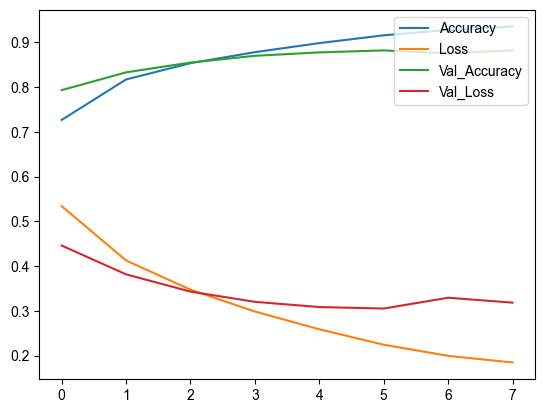

In [84]:
model_7 =lstm_(vocab_size = all_words , embedding_dim = embedding_dim, max_length=max_length, units = 64, embeddings_matrix=word_vector)
model_compile(model=model_7)
history = model_fit(model=model_7, X_train=encoded_X_train, y_train=y_train, X_test = encoded_X_test, y_test= y_test, epochs=10, batch_size=32)
plot_changes(histoty=history)       

**8-Bidirectional LSTM**

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 307s 244ms/step - accuracy: 0.6262 - loss: 0.6479 - val_accuracy: 0.7198 - val_loss: 0.5722 - learning_rate: 1.0000e-04
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 320s 256ms/step - accuracy: 0.7308 - loss: 0.5548 - val_accuracy: 0.7221 - val_loss: 0.5533 - learning_rate: 1.0000e-04
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 300s 240ms/step - accuracy: 0.7430 - loss: 0.5302 - val_accuracy: 0.7448 - val_loss: 0.5336 - learning_rate: 1.0000e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 288s 231ms/step - accuracy: 0.7641 - loss: 0.4970 - val_accuracy: 0.7623 - val_loss: 0.5134 - learning_rate: 1.0000e-04
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 280s 224ms/step - accuracy: 0.7849 - loss: 0.4640 - val_accuracy: 0.7726 - val_loss: 0.5037 - learning_rate: 1.0000e-04
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 280s 224ms/step - accuracy: 0.8032 - loss: 0.4328 - val_accuracy: 0.7793 - val_loss: 0.4965 - learning_rate: 1.0000e-04
Epoch 7/10
1250/1250 ━━━━━━━

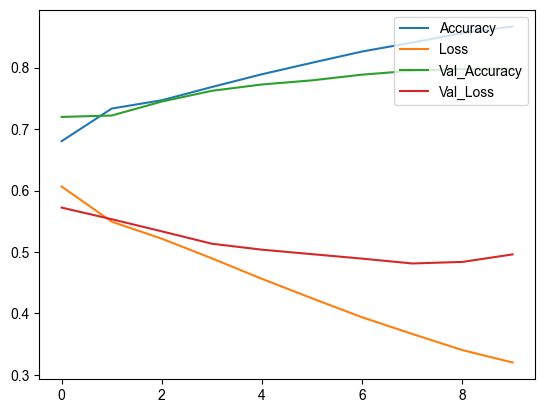

In [85]:
model_8 = bidirectional_lstm(vocab_size =all_words, embedding_dim = embedding_dim, max_length=max_length, units = 64, embeddings_matrix=word_vector)
model_compile(model=model_8)
history = model_fit(model=model_8, X_train=encoded_X_train, y_train=y_train, X_test= encoded_X_test, y_test=y_test, epochs=10, batch_size=32)
plot_changes(histoty=history)

**9-GRU**

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 217s 170ms/step - accuracy: 0.6433 - loss: 0.6144 - val_accuracy: 0.7952 - val_loss: 0.4462 - learning_rate: 1.0000e-04
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 239s 191ms/step - accuracy: 0.7991 - loss: 0.4381 - val_accuracy: 0.8255 - val_loss: 0.3871 - learning_rate: 1.0000e-04
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 244s 195ms/step - accuracy: 0.8387 - loss: 0.3723 - val_accuracy: 0.8489 - val_loss: 0.3470 - learning_rate: 1.0000e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 248s 198ms/step - accuracy: 0.8646 - loss: 0.3229 - val_accuracy: 0.8640 - val_loss: 0.3207 - learning_rate: 1.0000e-04
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 251s 201ms/step - accuracy: 0.8863 - loss: 0.2837 - val_accuracy: 0.8742 - val_loss: 0.2998 - learning_rate: 1.0000e-04
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 252s 202ms/step - accuracy: 0.9038 - loss: 0.2478 - val_accuracy: 0.8853 - val_loss: 0.2802 - learning_rate: 1.0000e-04
Epoch 7/10
1250/1250 ━━━━━━━

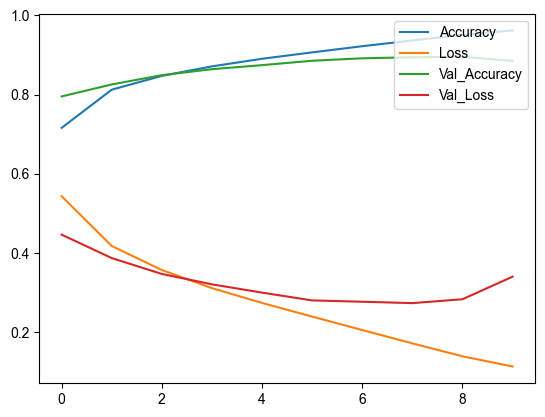

In [86]:
model_9 = gru_(vocab_size = all_words, embedding_dim = embedding_dim, max_length=max_length, units = 128, embeddings_matrix= word_vector)
model_compile(model=model_9)
history = model_fit(model=model_9, X_train=encoded_X_train, y_train=y_train, X_test= encoded_X_test, y_test=y_test, epochs=10, batch_size=32)
plot_changes(histoty=history)

# Model Inference

**1-Naive Bayes**

In [87]:
machine_learning_inference(model=model_1,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

**2-Logistic Regression**

In [88]:
machine_learning_inference(model=model_2,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**3-Decision Tree**

In [89]:
machine_learning_inference(model=model_3,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Positive

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**4-K Nearest Neighbors**

In [90]:
machine_learning_inference(model=model_4,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**5-Random Forest**

In [91]:
machine_learning_inference(model=model_5,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**6-SGD Classifier**

In [92]:
machine_learning_inference(model=model_6,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**7-LSTM**

In [93]:
deep_learning_inference(model = model_7, text = reviews, max_length = max_length, word_index = words_to_index)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**8-Bidirectional LSTM**

In [94]:
deep_learning_inference(model = model_8, text = reviews, max_length = max_length, word_index = words_to_index)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Negative

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

**9-GRU**

In [95]:
deep_learning_inference(model = model_9, text = reviews, max_length = max_length, word_index = words_to_index)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

# Transformers

In [96]:
sentiment_analysis_transformers(reviews)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use mps:0


Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye